<a href="https://colab.research.google.com/github/PoojithaPoosa/cv/blob/main/stock_market_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock ='GOOG'
data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2022-12-14,95.540001,97.220001,93.940002,95.309998,95.309998,26452900
2022-12-15,93.540001,94.029999,90.430000,91.199997,91.199997,28298800
2022-12-16,91.199997,91.750000,90.010002,90.860001,90.860001,48485500


In [7]:
ma_100_days = data.Close.rolling(100).mean()

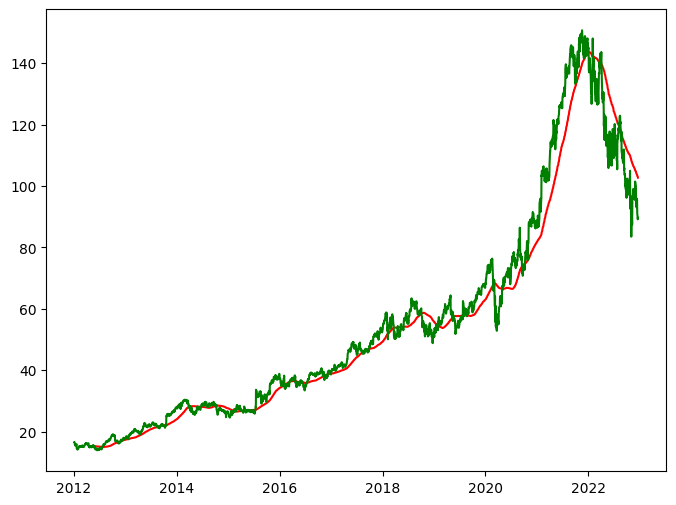

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()



In [8]:
ma_200_days = data.Close.rolling(200).mean()

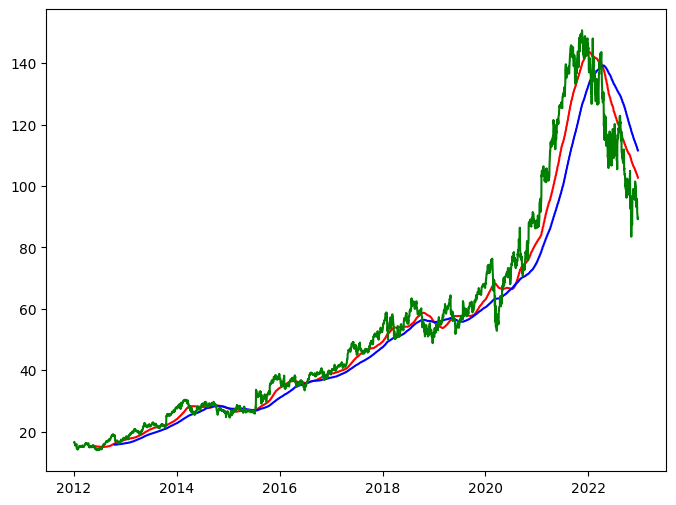

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [17]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [18]:
data_train.shape[0]

2208

In [19]:
data_test.shape[0]

553

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [24]:
data_train_scale = scaler.fit_transform(data_train)

In [25]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])



In [27]:
x, y = np.array(x), np.array(y)

In [28]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [34]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape =(x.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [35]:
model.compile(optimizer = 'adam',  loss = 'mean_squared_error')

In [36]:
model.fit(x,y, epochs = 50, batch_size = 32, verbose =1)

Epoch 1/50
66/66 [==============================] - 24s 277ms/step - loss: 0.0324
Epoch 2/50
66/66 [==============================] - 20s 306ms/step - loss: 0.0066
Epoch 3/50
66/66 [==============================] - 18s 278ms/step - loss: 0.0065
Epoch 4/50
66/66 [==============================] - 20s 298ms/step - loss: 0.0056
Epoch 5/50
66/66 [==============================] - 19s 288ms/step - loss: 0.0051
Epoch 6/50
66/66 [==============================] - 22s 335ms/step - loss: 0.0051
Epoch 7/50
66/66 [==============================] - 18s 278ms/step - loss: 0.0042
Epoch 8/50
66/66 [==============================] - 20s 297ms/step - loss: 0.0040
Epoch 9/50
66/66 [==============================] - 18s 278ms/step - loss: 0.0044
Epoch 10/50
66/66 [==============================] - 20s 300ms/step - loss: 0.0041
Epoch 11/50
66/66 [==============================] - 18s 280ms/step - loss: 0.0042
Epoch 12/50
66/66 [==============================] - 20s 300ms/step - loss: 0.0041
Epoch 13/50
6

In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [38]:
pas_100_days = data_train.tail(100)

In [39]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [41]:
data_test_scale = scaler.fit_transform(data_test)

In [43]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)


In [44]:
y_predict = model.predict(x)

18/18 [==============================] - 2s 82ms/step


In [48]:
scale =1/scaler.scale_

In [49]:
y_predict = y_predict*scale

In [50]:
y = y*scale

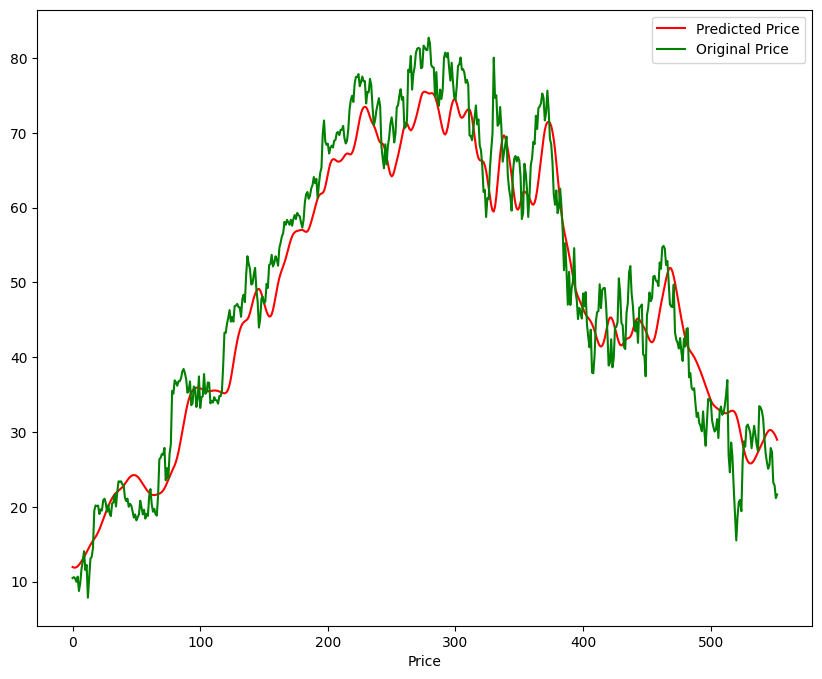

In [53]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Price')
plt.legend()
plt.show()

In [54]:
model.save('Stock Predictiom Model.keras')